In [2]:
import os
os.chdir('..')
import numpy as np
import datajoint as dj

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

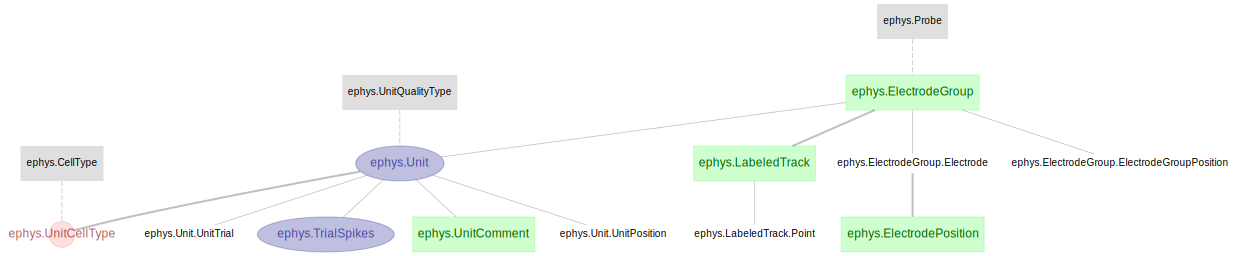

In [3]:
from pipeline import ephys as ephys
dj.ERD(ephys)

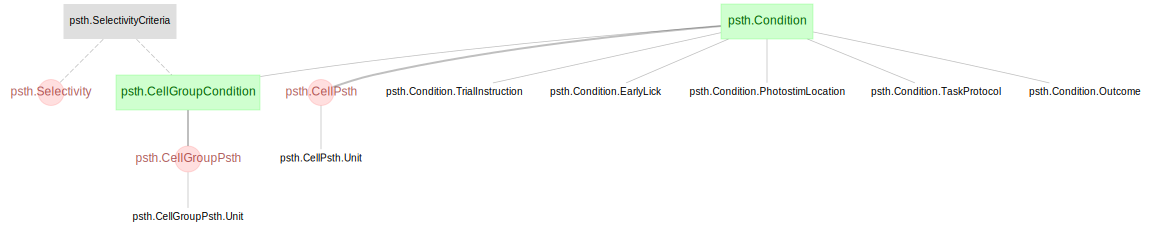

In [4]:
from pipeline import psth as psth
dj.ERD(psth)

In [6]:
behaviorT=experiment.BehaviorTrial()

In [8]:
animal = 435884
sessionN = 20
sess_key = {'subject_id': animal, 'session': sessionN}


contraH=(behaviorT & sess_key & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"')
ipsiH=(behaviorT & sess_key & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"')

contraE=(behaviorT & sess_key & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"')
ipsiE=(behaviorT & sess_key & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"')

In [24]:
(contraE).fetch('trial')

array([ 60,  72,  86,  87, 100, 107, 125, 135, 146, 251, 277, 294, 323,
       326, 331, 332, 391, 392, 402, 443, 450, 462, 469, 483, 487, 513,
       530, 536, 541, 545, 548, 551, 555, 562, 669], dtype=int64)

In [32]:
(contraH).fetch('trial')

array([ 54,  55,  56,  57,  59,  61,  63,  64,  65,  66,  68,  69,  70,
        71,  73,  77,  78,  79,  81,  82,  85,  88,  89,  90,  92,  93,
        96, 102, 103, 104, 105, 106, 109, 111, 112, 117, 119, 121, 123,
       127, 129, 131, 133, 136, 138, 139, 140, 141, 143, 144, 145, 147,
       148, 150, 151, 152, 154, 155, 157, 158, 159, 161, 163, 164, 165,
       166, 169, 170, 171, 172, 173, 175, 180, 184, 186, 187, 192, 195,
       197, 199, 202, 204, 209, 212, 216, 221, 225, 226, 229, 230, 231,
       236, 243, 244, 245, 246, 247, 250, 253, 254, 255, 256, 257, 258,
       261, 262, 264, 265, 267, 268, 273, 278, 280, 281, 282, 287, 288,
       289, 291, 292, 293, 301, 302, 306, 307, 311, 312, 319, 324, 325,
       328, 330, 333, 334, 336, 337, 338, 339, 340, 341, 344, 345, 348,
       351, 352, 353, 357, 359, 361, 364, 366, 369, 370, 371, 374, 375,
       377, 378, 380, 381, 382, 384, 385, 390, 395, 396, 399, 401, 403,
       404, 405, 406, 408, 411, 413, 414, 415, 416, 417, 418, 42

In [12]:
(behaviorT & sess_key).fetch('trial')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
photostimT=experiment.PhotostimTrialEvent()

In [10]:
a=(photostimT & sess_key)

In [11]:
a

subject_id institution 6 digit animal ID,session session number,trial trial number,photostim_device,photo_stim,hemisphere,brain_area,brainloc_id id within BrainArea,photostim_event_time (s) from trial start,power Maximal power (mW)
435884,20,0,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,1,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,2,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,3,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,4,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,5,OBIS470,0,both,ALM,0,0.500,0.000
435884,20,6,OBIS470,0,both,ALM,0,0.500,0.000


In [12]:
unit=ephys.Unit()

In [13]:
goodUnits=(unit & sess_key & {'unit_quality': 'good'})
goodUnits

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,unit_uid unique across sessions/animals,unit_quality,unit_channel channel on the electrode for which the unit has the largest amplitude,spike_times (s),waveform average spike waveform
435884,20,1,0,0,good,nan,=BLOB=,=BLOB=
435884,20,1,4,4,good,nan,=BLOB=,=BLOB=
435884,20,1,9,9,good,nan,=BLOB=,=BLOB=
435884,20,1,10,10,good,nan,=BLOB=,=BLOB=
435884,20,1,14,14,good,nan,=BLOB=,=BLOB=
435884,20,1,17,17,good,nan,=BLOB=,=BLOB=
435884,20,1,20,20,good,nan,=BLOB=,=BLOB=


In [14]:
def plot_psth(unit_key): # {'subject_id', 'session', 'electrode_group', 'unit'}
    
    max_trial_off = 500
    binSize=0.04
    plt_xmin=-3
    plt_xmax=3
    plt_ymin=0
    plt_ymax=None  # dynamic per unit
    
    # fetch spikes/trials
    contraH_spikes, contraH_trials = ((ephys.TrialSpikes() & unit_key & contraH) - photostimT).fetch('spike_times', 'trial')
    ipsiH_spikes, ipsiH_trials = ((ephys.TrialSpikes() & unit_key & ipsiH) - photostimT).fetch('spike_times', 'trial')
    contraE_spikes, contraE_trials = ((ephys.TrialSpikes() & unit_key & contraE) - photostimT).fetch('spike_times', 'trial')
    ipsiE_spikes, ipsiE_trials = ((ephys.TrialSpikes() & unit_key & ipsiE) - photostimT).fetch('spike_times', 'trial')

    # adjust dimensions for plotting ([trial spikes, ...] v [trialno[len(trial spikes)], ...])
    flat_contraH_spikes = np.concatenate(contraH_spikes)
    flat_contraH_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(contraH_spikes, contraH_trials)])

    flat_ipsiH_spikes = np.concatenate(ipsiH_spikes)
    flat_ipsiH_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(ipsiH_spikes, ipsiH_trials)])
    
    flat_contraE_spikes = np.concatenate(contraE_spikes)
    flat_contraE_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(contraE_spikes, contraE_trials)])

    flat_ipsiE_spikes = np.concatenate(ipsiE_spikes)
    flat_ipsiE_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(ipsiE_spikes, ipsiE_trials)])

    # compute psth for each group
    psth_contraH=list(np.histogram(flat_contraH_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_contraH[0]=psth_contraH[0]/len(contraH)/binSize
    
    psth_ipsiH=list(np.histogram(flat_ipsiH_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_ipsiH[0]=psth_ipsiH[0]/len(ipsiH)/binSize
    
    psth_contraE=list(np.histogram(flat_contraE_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_contraE[0]=psth_contraE[0]/len(contraE)/binSize
    
    psth_ipsiE=list(np.histogram(flat_ipsiE_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_ipsiE[0]=psth_ipsiE[0]/len(ipsiE)/binSize    

    plt_ymax = np.max([psth_contraH[0], psth_ipsiH[0], psth_contraE[0], psth_ipsiE[0]])

    # Raster Plots (plt.plot(spike_times_for_unit, trial_number_for_spike))
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(flat_contraH_spikes, flat_contraH_trials + max_trial_off, 'b.', markersize=1)
    plt.plot(flat_ipsiH_spikes, flat_ipsiH_trials, 'r.', markersize=1)
    ax.set_axis_off()
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    
    # Histogram Plots    
    ax = plt.subplot(312)
    plt.plot(psth_contraH[1][1:], psth_contraH[0], 'b')
    plt.plot(psth_ipsiH[1][1:], psth_ipsiH[0], 'r')

    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.set_ylim([plt_ymin, plt_ymax])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    plt.title('Correct trials')

    ax = plt.subplot(313)
    plt.plot(psth_contraE[1][1:], psth_contraE[0]/len(contraE)/binSize, 'b')
    plt.plot(psth_ipsiE[1][1:], psth_ipsiE[0]/len(ipsiE)/binSize, 'r')

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.set_ylim([plt_ymin, plt_ymax])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')
    plt.show()

In [15]:
def plot_psth_renumber(unit_key): # {'subject_id', 'session', 'electrode_group', 'unit'}
    
    max_trial_off = 500
    binSize=0.04
    plt_xmin=-3
    plt_xmax=3
    plt_ymin=0
    plt_ymax=None  # dynamic per unit
    
    # fetch spikes/trials
    contraH_spikes, contraH_trials = ((ephys.TrialSpikes() & unit_key & contraH) - photostimT).fetch('spike_times', 'trial')
    ipsiH_spikes, ipsiH_trials = ((ephys.TrialSpikes() & unit_key & ipsiH) - photostimT).fetch('spike_times', 'trial')
    contraE_spikes, contraE_trials = ((ephys.TrialSpikes() & unit_key & contraE) - photostimT).fetch('spike_times', 'trial')
    ipsiE_spikes, ipsiE_trials = ((ephys.TrialSpikes() & unit_key & ipsiE) - photostimT).fetch('spike_times', 'trial')
    
    t, s = (ephys.TrialSpikes() & tgt).fetch('trial','spike_times')
    trial_spike_map = {t[i]: s[i] for i in range(len(t))}
    
    contraH_spikes = [trial_spike_map[i+1] for i in contraH_trials if i!=173]
    ipsiH_spikes = [trial_spike_map[i+1] for i in ipsiH_trials if i!=173]
    contraE_spikes = [trial_spike_map[i+1] for i in contraE_trials if i!=173]
    ipsiE_spikes = [trial_spike_map[i+1] for i in ipsiE_trials if i!=173]

    # adjust dimensions for plotting ([trial spikes, ...] v [trialno[len(trial spikes)], ...])
    flat_contraH_spikes = np.concatenate(contraH_spikes)
    flat_contraH_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(contraH_spikes, contraH_trials)])

    flat_ipsiH_spikes = np.concatenate(ipsiH_spikes)
    flat_ipsiH_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(ipsiH_spikes, ipsiH_trials)])
    
    flat_contraE_spikes = np.concatenate(contraE_spikes)
    flat_contraE_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(contraE_spikes, contraE_trials)])

    flat_ipsiE_spikes = np.concatenate(ipsiE_spikes)
    flat_ipsiE_trials = np.concatenate([[trial] * len(spikes) for spikes, trial in zip(ipsiE_spikes, ipsiE_trials)])

    # compute psth for each group
    psth_contraH=list(np.histogram(flat_contraH_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_contraH[0]=psth_contraH[0]/len(contraH)/binSize
    
    psth_ipsiH=list(np.histogram(flat_ipsiH_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_ipsiH[0]=psth_ipsiH[0]/len(ipsiH)/binSize
    
    psth_contraE=list(np.histogram(flat_contraE_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_contraE[0]=psth_contraE[0]/len(contraE)/binSize
    
    psth_ipsiE=list(np.histogram(flat_ipsiE_spikes, bins=np.arange(plt_xmin, plt_xmax, binSize)))
    psth_ipsiE[0]=psth_ipsiE[0]/len(ipsiE)/binSize    

    plt_ymax = np.max([psth_contraH[0], psth_ipsiH[0], psth_contraE[0], psth_ipsiE[0]])

    # Raster Plots (plt.plot(spike_times_for_unit, trial_number_for_spike))
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(flat_contraH_spikes, flat_contraH_trials + max_trial_off, 'b.', markersize=1)
    plt.plot(flat_ipsiH_spikes, flat_ipsiH_trials, 'r.', markersize=1)
    ax.set_axis_off()
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    
    # Histogram Plots    
    ax = plt.subplot(312)
    plt.plot(psth_contraH[1][1:], psth_contraH[0], 'b')
    plt.plot(psth_ipsiH[1][1:], psth_ipsiH[0], 'r')

    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.set_ylim([plt_ymin, plt_ymax])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    plt.title('Correct trials')

    ax = plt.subplot(313)
    plt.plot(psth_contraE[1][1:], psth_contraE[0]/len(contraE)/binSize, 'b')
    plt.plot(psth_ipsiE[1][1:], psth_ipsiE[0]/len(ipsiE)/binSize, 'r')

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([plt_xmin, plt_xmax])
    ax.set_ylim([plt_ymin, plt_ymax])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.4,0,1, ls='--')
    
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')
    plt.show()

In [19]:
unit_key = {'unit_uid': 4}
goodUnits & unit_key

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,unit_uid unique across sessions/animals,unit_quality,unit_channel channel on the electrode for which the unit has the largest amplitude,spike_times (s),waveform average spike waveform
435884,20,1,4,4,good,nan,=BLOB=,=BLOB=


In [20]:
tgt = (goodUnits & unit_key).fetch1(dj.key)

In [21]:
tgt

{'electrode_group': 1, 'session': 20, 'subject_id': 435884, 'unit': 4}

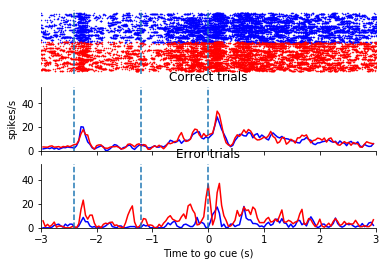

In [22]:
plot_psth(tgt)

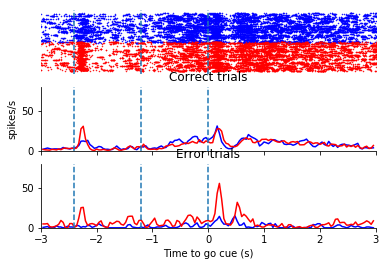

In [23]:
plot_psth_renumber(tgt)

In [29]:
x = goodUnits.fetch('KEY')[1]
all_spikes, all_trials = (ephys.TrialSpikes() & x).fetch('spike_times', 'trial')

In [30]:
all_trials.shape


(524,)